In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
x1 = np.random.normal(loc=11, scale=2.0, size=100)
y1 = np.random.normal(loc=5, scale=3.0, size=100)

x2 = np.random.normal(loc=3, scale=1.5, size=75)
y2 = np.random.normal(loc=15, scale=2.0, size=75)

x3 = np.random.normal(loc=16, scale=1, size=50)
y3 = np.random.normal(loc=20.5, scale=1.5, size=50)

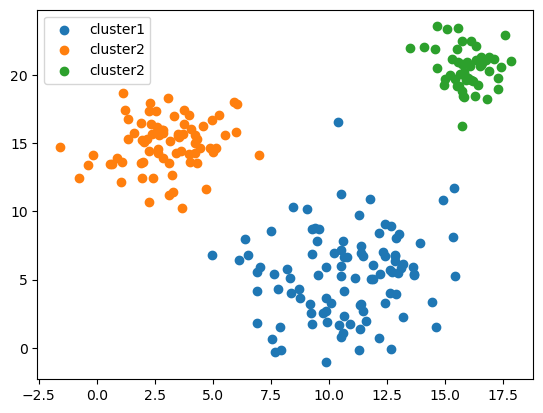

In [3]:
plt.scatter(x1, y1, label="cluster1")
plt.scatter(x2, y2, label="cluster2")
plt.scatter(x3, y3, label="cluster2")

plt.legend()
plt.show()

In [4]:
X = np.expand_dims(np.append(np.append(x1, x2), x3), axis=1)
Y = np.expand_dims(np.append(np.append(y1, y2), y3), axis=1)

data = np.concatenate((X,Y), axis=1)

In [5]:
X.shape

(225, 1)

In [6]:
data.shape

(225, 2)

In [7]:
data[:5]

array([[12.19305477,  5.43957159],
       [ 7.88065676,  1.52118632],
       [ 8.74374139,  3.65025608],
       [13.00797197,  8.37914774],
       [12.91641253,  3.92541194]])

## Model

Total cost calculation for a assignment: 
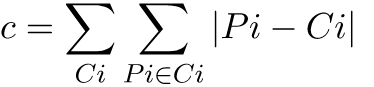
(Sum of the distances of all the points from their assigned medoid)

In [8]:
def eucl_dist(p1, p2):
    ### dist = Implement this ###
    ##### your code #####
    
    return dist

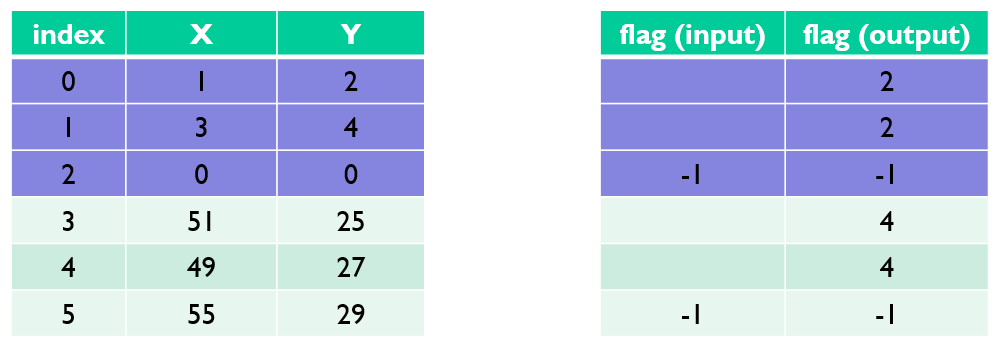

In [8]:
def cost_calc(dataPoints, flag):
    # Takes the datapoints and the flag array as input
    # Returns the cost and the flag array
    # Note: The input flag array contains -1 in the index that is of a medoids,
    #        and the output flag contains -1 in the index that is of a medoids,
    #           and for non medoids it stores the index of the mediod, in which cluster the sample belong (i.e. the label)
    
    ### Calculate cost and flag
    ##### your code #####
    
    return cost, flag

def KMedoid(dataPoints, k):
    # takes data points returns k points as cluster mid
    
    flag = np.zeros(shape=dataPoints.shape[0])
    # 1. Select k mediod randomly from data points
    m_ind = np.random.choice(dataPoints.shape[0], k, replace=False)
    # print(m_ind)
    flag[m_ind] = -1 # signifies a medoid
    # print(flag)
    
    # 2. Associate each data point to the closest medoid by using any common distance metric methods.
    cost, flag = cost_calc(dataPoints, flag)
    # print(flag)
    
    '''
    3. While the cost decreases: For each medoid m, for each data o point which is not a medoid: 

       a) Swap m and o, associate each data point to the closest medoid, and recompute the cost. 
       b) If the total cost is more than that in the previous step, undo the swap.
    '''
    prev_cost = cost + 1
    iteration = 0
    while prev_cost > cost:
        # print(flag)
        print(iteration, " no. iteration: ", cost)
        iteration += 1
        prev_cost = cost
        for ind, m in enumerate(m_ind):            
            for i, d in enumerate(dataPoints):
                if flag[i] == -1:
                    continue
                
                flag[m] = 0 # some random assignment, cause this is surely gonna get replaced
                flag[i] = -1 # new medoid
                
                # now cost calculation
                new_cost, flag = cost_calc(dataPoints, flag)
                if new_cost < cost:
                    m_ind[ind] = i
                    cost = new_cost
                    break
                
                flag[i] = 0 # if doesn't break, remove from medoid
                flag[m] = -1 # reassign as a medoid
    
    # Fianl cost and flags
    cost, flag = cost_calc(dataPoints, flag)
    return m_ind, flag

In [68]:
medoids, assigns = KMedoid(data, 2)

0  no. iteration:  9885.574196761416
1  no. iteration:  9183.557790805644
2  no. iteration:  6042.259681200239
3  no. iteration:  3787.2658944816208
4  no. iteration:  1914.1578987241746
5  no. iteration:  1800.536191809009
6  no. iteration:  1779.6668424617792
7  no. iteration:  1771.7456686089618
8  no. iteration:  1769.6922937098304
9  no. iteration:  1767.6512725092005


In [69]:
data[medoids]

array([[11.59085061,  4.97835154],
       [ 3.16758785, 15.13958291]])

In [70]:
data[medoids[0]][0], data[medoids[0]][1]

(11.590850611020452, 4.978351543936847)

In [71]:
assigns

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.])

### Lets visualize your answers

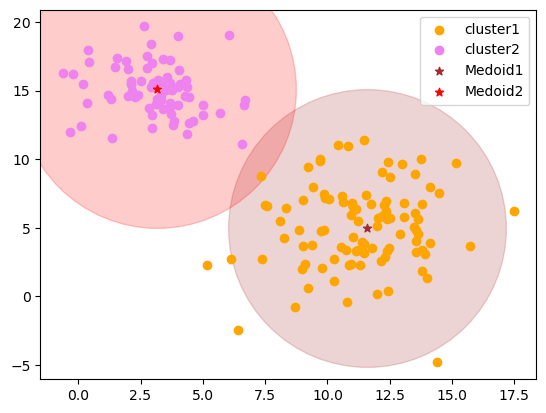

In [92]:
c1 = data[assigns==0]
c2 = data[assigns==1]

plt.scatter(data[medoids[0]][0], data[medoids[0]][1], color="brown", alpha=0.2, s=40000)
plt.scatter(data[medoids[1]][0], data[medoids[1]][1], color="red", alpha=0.2, s=40000)

plt.scatter(c1[:, 0], c1[:, 1], label="cluster1", color="orange")
plt.scatter(c2[:, 0], c2[:, 1], label="cluster2", color="violet")

plt.scatter(data[medoids[0]][0], data[medoids[0]][1], label="Medoid1", marker="*", color="brown")
plt.scatter(data[medoids[1]][0], data[medoids[1]][1], label="Medoid2", marker="*", color="red")

plt.legend()
plt.show()